In [1]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

# Data Pre-Processing functions

NOTE TO SELF: Use boolean masking to cut dataframes whenever possible -> much faster than pd.drop

In [7]:
def process_data(data_path, del_cols=[], cuts=True):
    """
    This functions reads and pre-processes all the data in the chosen data_path with pandas
    
    data_path -> string: the path of the data to be acquired and pre-processed\n
    del_cols -> [string]: all columns to be deleted from the dataframe\n
    btag_cols -> [string]: list of columns referring to btag count\n
    lepton_cols -> [string]: list of columns referring to lepton count\n
    cut -> bool: whether or not cuts are to be applied to the data
    
    return -> pandas dataframe: pre-processed data
    """
    
    # Initializing variables
    data = []
    total_drop, total_len = 0, 0
    files = glob(data_path + "/*.csv")
    files += glob(data_path + "/*.h5")
    
    # Collect all data from path
    for file in tqdm(files, total=len(files), desc="Preprocessing Data"):
        # Read sample
        if file.endswith(".csv"): df = pd.read_csv(file)
        elif file.endswith(".h5"): df = pd.read_hdf(file)
        else: raise ValueError("Unrecognized file format")
            
        # Sort indices
        df.sort_index(inplace=True)
        
        # Apply cuts
        sample = file.split("/")[-1].split(".")[0]
        if cuts:
            len_inc = df.shape[0]
            total_len += len_inc
            df = df[df["Electron_Multi"] + df["Muon_Multi"] > 1] # At least 2 leptons
            df = df[df["FatJet_Multi"] > 0] # At least 1 FatJet
            tqdm.write(f" Sample: {sample} | Original Size: {len_inc} | Drop_Ratio: {(len_inc - df.shape[0])/len_inc:.3f}")
            total_drop += len_inc - df.shape[0]
        
        # Delete columns
        df.drop([col for col in del_cols if col in df], axis=1, inplace=True)
        
        # Calculate gen_weights
        df["gen_xsec"] = df["gen_xsec"].mean() / df.shape[0]
        df.rename(columns={"gen_xsec":"gen_weights"}, inplace=True)
        
        # Add sample and label columns
        if file.split("/")[-2] == "dileptonic": df["Label"] = 0
        elif file.split("/")[-2] == "sm_gluon_vlq": df["Label"] = 1
        else: raise ValueError("Unrecognized data folder")
        df["Sample"] = sample
        
        data.append(df)
        
    # Concatenate data
    if len(data) > 1: data = pd.concat(data)
    else: data = data[0]
        
    if cuts: print(f"Total Drop Ratio: {total_drop/total_len:.3f}")
        
    return data

# Cut Testing

In [4]:
# Delete columns list
del_cols = ["gen_decay1", "gen_decay2", "gen_sample", "gen_filter", "gen_decay_filter", "MissingET_Eta"]

In [5]:
data_path = "data/dileptonic"
uncut_bkgd = process_data(data_path, del_cols)

Preprocessing Data:   6%|▌         | 1/18 [00:00<00:08,  2.01it/s]

 Sample: ttbarZ_2L | Original Size: 100000 | Drop_Ratio: 0.495


Preprocessing Data:  11%|█         | 2/18 [00:15<01:18,  4.91s/it]

 Sample: Zbj_2L | Original Size: 4000000 | Drop_Ratio: 0.634


Preprocessing Data:  17%|█▋        | 3/18 [00:28<01:47,  7.19s/it]

 Sample: Zbb_2L | Original Size: 4000000 | Drop_Ratio: 0.625


Preprocessing Data:  22%|██▏       | 4/18 [00:42<02:11,  9.37s/it]

 Sample: Zjj_2L | Original Size: 4000000 | Drop_Ratio: 0.713


Preprocessing Data:  28%|██▊       | 5/18 [00:44<01:32,  7.08s/it]

 Sample: ZZ_2L | Original Size: 500000 | Drop_Ratio: 0.635


Preprocessing Data:  33%|███▎      | 6/18 [00:44<01:00,  5.03s/it]

 Sample: ttbarZ_2L_test | Original Size: 50000 | Drop_Ratio: 0.496


Preprocessing Data:  39%|███▉      | 7/18 [00:44<00:39,  3.59s/it]

 Sample: topZj_2L_test | Original Size: 50000 | Drop_Ratio: 0.551


Preprocessing Data:  44%|████▍     | 8/18 [00:45<00:25,  2.59s/it]

 Sample: topWZ_2L | Original Size: 50000 | Drop_Ratio: 0.475


Preprocessing Data:  50%|█████     | 9/18 [00:45<00:16,  1.88s/it]

 Sample: topZj_2L_train | Original Size: 50000 | Drop_Ratio: 0.550


Preprocessing Data:  56%|█████▌    | 10/18 [00:45<00:11,  1.45s/it]

 Sample: ttbarW_2L | Original Size: 100000 | Drop_Ratio: 0.596


Preprocessing Data:  61%|██████    | 11/18 [00:46<00:07,  1.14s/it]

 Sample: topZj_2L | Original Size: 100000 | Drop_Ratio: 0.550


Preprocessing Data:  67%|██████▋   | 12/18 [00:47<00:07,  1.32s/it]

 Sample: WZ_2L | Original Size: 500000 | Drop_Ratio: 0.594


Preprocessing Data:  72%|███████▏  | 13/18 [01:03<00:28,  5.60s/it]

 Sample: ttbarb_2L | Original Size: 3899999 | Drop_Ratio: 0.644


Preprocessing Data:  78%|███████▊  | 14/18 [01:03<00:15,  3.99s/it]

 Sample: ttbarZ_2L_train | Original Size: 50000 | Drop_Ratio: 0.494


Preprocessing Data:  83%|████████▎ | 15/18 [01:05<00:10,  3.44s/it]

 Sample: ttbarH_2L | Original Size: 500000 | Drop_Ratio: 0.675


Preprocessing Data:  89%|████████▉ | 16/18 [01:07<00:05,  2.99s/it]

 Sample: ttbar_2L | Original Size: 500000 | Drop_Ratio: 0.623


Preprocessing Data:  94%|█████████▍| 17/18 [01:24<00:06,  6.99s/it]

 Sample: ttbarj_2L | Original Size: 4000000 | Drop_Ratio: 0.647


Preprocessing Data: 100%|██████████| 18/18 [01:25<00:00,  4.76s/it]


 Sample: WW_2L | Original Size: 500000 | Drop_Ratio: 0.674
Total Drop Ratio: 0.648


In [6]:
data_path = "data/sm_gluon_vlq"
uncut_vlq = process_data(data_path, del_cols)

Preprocessing Data:  14%|█▍        | 1/7 [00:01<00:07,  1.29s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1200_test | Original Size: 250000 | Drop_Ratio: 0.938


Preprocessing Data:  29%|██▊       | 2/7 [00:02<00:06,  1.28s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1200_train | Original Size: 250000 | Drop_Ratio: 0.939


Preprocessing Data:  43%|████▎     | 3/7 [00:03<00:05,  1.28s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1400_train | Original Size: 250000 | Drop_Ratio: 0.941


Preprocessing Data:  57%|█████▋    | 4/7 [00:13<00:11,  3.83s/it]

 Sample: smg | Original Size: 1900000 | Drop_Ratio: 0.935


Preprocessing Data:  71%|███████▏  | 5/7 [00:14<00:06,  3.06s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1000_test | Original Size: 250000 | Drop_Ratio: 0.935


Preprocessing Data:  86%|████████▌ | 6/7 [00:16<00:02,  2.53s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1000_train | Original Size: 250000 | Drop_Ratio: 0.936


Preprocessing Data: 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1400_test | Original Size: 250000 | Drop_Ratio: 0.942
Total Drop Ratio: 0.937


In [8]:
# Testing cut ratio
vlq_ratio = uncut_vlq[uncut_vlq["FatJet_Multi"] > 0]
vlq_ratio = vlq_ratio[sum([vlq_ratio[col] for col in vlq_ratio if "BTag" in col]) > 0].shape[0] / uncut_vlq.shape[0]
bkgd_ratio = uncut_bkgd[uncut_bkgd["FatJet_Multi"] > 0]
bkgd_ratio = bkgd_ratio[sum([bkgd_ratio[col] for col in bkgd_ratio if "BTag" in col]) > 0].shape[0] / uncut_bkgd.shape[0]
print(vlq_ratio, bkgd_ratio)
print(vlq_ratio / bkgd_ratio)

0.8612769589764288 0.05820788064834589
14.79656962911437


In [ ]:
# Verify ScalarHT_HT distribution variation
hist_min = min(vlq["ScalarHT_HT"].min(), uncut_vlq["ScalarHT_HT"].min())
hist_max = max(vlq["ScalarHT_HT"].max(), uncut_vlq["ScalarHT_HT"].max())
hist_range = hist_min, hist_max

plt.title("ScalarHT_HT Distributions")
plt.hist(vlq["ScalarHT_HT"], bins=50, label="vlq", range=hist_range, weights=vlq["gen_weights"], histtype="step")
plt.hist(uncut_vlq["ScalarHT_HT"], bins=50, label="uncut_vlq", range=hist_range, weights=uncut_vlq["gen_weights"], histtype="step")
plt.yscale("log")
plt.legend()
plt.savefig("2L_vs_2L_and_1FJ_cut.png", dpi=800)
plt.show()

# Import Data

In [10]:
# PreProcess bkgd data
data_path = "data/dileptonic"
bkgd = process_data(data_path, del_cols)
bkgd

Preprocessing Data:   6%|▌         | 1/18 [00:00<00:07,  2.25it/s]

 Sample: ttbarZ_2L | Original Size: 100000 | Drop_Ratio: 0.790


Preprocessing Data:  11%|█         | 2/18 [00:14<01:11,  4.46s/it]

 Sample: Zbj_2L | Original Size: 4000000 | Drop_Ratio: 0.987


Preprocessing Data:  17%|█▋        | 3/18 [00:26<01:40,  6.69s/it]

 Sample: Zbb_2L | Original Size: 4000000 | Drop_Ratio: 0.998


Preprocessing Data:  22%|██▏       | 4/18 [00:39<02:03,  8.80s/it]

 Sample: Zjj_2L | Original Size: 4000000 | Drop_Ratio: 0.986


Preprocessing Data:  28%|██▊       | 5/18 [00:41<01:26,  6.65s/it]

 Sample: ZZ_2L | Original Size: 500000 | Drop_Ratio: 0.985


Preprocessing Data:  33%|███▎      | 6/18 [00:41<00:56,  4.73s/it]

 Sample: ttbarZ_2L_test | Original Size: 50000 | Drop_Ratio: 0.792


Preprocessing Data:  39%|███▉      | 7/18 [00:41<00:37,  3.37s/it]

 Sample: topZj_2L_test | Original Size: 50000 | Drop_Ratio: 0.905


Preprocessing Data:  44%|████▍     | 8/18 [00:42<00:24,  2.43s/it]

 Sample: topWZ_2L | Original Size: 50000 | Drop_Ratio: 0.786


Preprocessing Data:  50%|█████     | 9/18 [00:42<00:15,  1.76s/it]

 Sample: topZj_2L_train | Original Size: 50000 | Drop_Ratio: 0.906


Preprocessing Data:  56%|█████▌    | 10/18 [00:42<00:10,  1.36s/it]

 Sample: ttbarW_2L | Original Size: 100000 | Drop_Ratio: 0.905


Preprocessing Data:  61%|██████    | 11/18 [00:43<00:07,  1.07s/it]

 Sample: topZj_2L | Original Size: 100000 | Drop_Ratio: 0.906


Preprocessing Data:  67%|██████▋   | 12/18 [00:44<00:07,  1.25s/it]

 Sample: WZ_2L | Original Size: 500000 | Drop_Ratio: 0.983


Preprocessing Data:  72%|███████▏  | 13/18 [00:59<00:27,  5.41s/it]

 Sample: ttbarb_2L | Original Size: 3899999 | Drop_Ratio: 0.968


Preprocessing Data:  78%|███████▊  | 14/18 [01:00<00:15,  3.85s/it]

 Sample: ttbarZ_2L_train | Original Size: 50000 | Drop_Ratio: 0.789


Preprocessing Data:  83%|████████▎ | 15/18 [01:02<00:09,  3.32s/it]

 Sample: ttbarH_2L | Original Size: 500000 | Drop_Ratio: 0.908


Preprocessing Data:  89%|████████▉ | 16/18 [01:04<00:05,  2.88s/it]

 Sample: ttbar_2L | Original Size: 500000 | Drop_Ratio: 0.964


Preprocessing Data:  94%|█████████▍| 17/18 [01:19<00:06,  6.75s/it]

 Sample: ttbarj_2L | Original Size: 4000000 | Drop_Ratio: 0.949


Preprocessing Data: 100%|██████████| 18/18 [01:21<00:00,  4.52s/it]

 Sample: WW_2L | Original Size: 500000 | Drop_Ratio: 0.991
Total Drop Ratio: 0.973


,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights,Label,Sample
6,1,222.386703,0.000000,0.0,0.0,0.0,89.281700,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,74.745476,-2.622154,646.912720,0.000002,0,ttbarZ_2L
21,1,355.976532,0.000000,0.0,0.0,0.0,92.403839,0.000000,0.0,0.0,...,1.303101,1.311433,-3.124268,2.662745,62.061245,0.126687,738.070923,0.000002,0,ttbarZ_2L
22,1,379.277893,0.000000,0.0,0.0,0.0,92.015945,0.000000,0.0,0.0,...,-0.443531,0.041256,0.257705,0.629130,154.406555,2.711888,1017.925659,0.000002,0,ttbarZ_2L
27,2,315.526428,210.032394,0.0,0.0,0.0,79.493019,69.408371,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,88.304909,1.464204,784.078552,0.000002,0,ttbarZ_2L
28,2,339.583130,219.172821,0.0,0.0,0.0,116.564987,78.811958,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,99.853302,0.038497,775.420654,0.000002,0,ttbarZ_2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499383,2,562.090515,406.163391,0.0,0.0,0.0,33.144203,32.881790,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,158.903229,-1.832084,989.765320,0.000734,0,WW_2L
499720,2,297.991119,216.625351,0.0,0.0,0.0,122.802528,0.000004,0.0,0.0,...,-0.388207,-0.442014,0.494916,-2.443376,90.066765,0.922439,516.766602,0.000734,0,WW_2L
499778,2,445.022675,322.059509,0.0,0.0,0.0,43.183895,0.000005,0.0,0.0,...,-0.231364,0.000000,2.371314,0.000000,117.803192,2.502448,845.329529,0.000734,0,WW_2L
499884,2,292.791809,240.076736,0.0,0.0,0.0,7.178124,71.778534,0.0,0.0,...,1.316574,0.000000,1.245588,0.000000,48.155449,1.515914,537.060669,0.000734,0,WW_2L


In [11]:
#Pre-Process VLQ data
data_path = "data/sm_gluon_vlq"
vlq = process_data(data_path, del_cols)
vlq

Preprocessing Data:  14%|█▍        | 1/7 [00:01<00:07,  1.24s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1200_test | Original Size: 250000 | Drop_Ratio: 0.938


Preprocessing Data:  29%|██▊       | 2/7 [00:02<00:06,  1.25s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1200_train | Original Size: 250000 | Drop_Ratio: 0.939


Preprocessing Data:  43%|████▎     | 3/7 [00:03<00:05,  1.25s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1400_train | Original Size: 250000 | Drop_Ratio: 0.941


Preprocessing Data:  57%|█████▋    | 4/7 [00:13<00:11,  3.71s/it]

 Sample: smg | Original Size: 1900000 | Drop_Ratio: 0.936


Preprocessing Data:  71%|███████▏  | 5/7 [00:14<00:05,  2.97s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1000_test | Original Size: 250000 | Drop_Ratio: 0.935


Preprocessing Data:  86%|████████▌ | 6/7 [00:15<00:02,  2.45s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1000_train | Original Size: 250000 | Drop_Ratio: 0.936


Preprocessing Data: 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]

 Sample: mch45_HG_13TeV_wohg_HQ1400_test | Original Size: 250000 | Drop_Ratio: 0.942
Total Drop Ratio: 0.937


,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights,Label,Sample
8,4,679.288574,637.196655,575.872986,465.836670,0.000000,237.651794,84.461655,95.651817,168.446136,...,1.093419,0.041427,-2.275989,3.101779,59.826347,-1.571166,2314.953613,5.453681e-07,1,mch45_HG_13TeV_wohg_HQ1200_test
72,3,722.096008,712.639893,292.318909,0.000000,0.000000,95.335800,268.030182,64.672127,0.000000,...,-1.049473,0.000000,-0.830934,0.000000,854.150696,-1.032758,1928.374756,5.453681e-07,1,mch45_HG_13TeV_wohg_HQ1200_test
82,3,630.115234,305.956909,283.162201,0.000000,0.000000,114.620941,91.065170,96.998154,0.000000,...,0.621256,0.000000,1.390831,0.000000,701.605103,-2.040793,1302.086548,5.453681e-07,1,mch45_HG_13TeV_wohg_HQ1200_test
115,3,615.789185,381.363312,289.322754,0.000000,0.000000,157.678223,123.475723,64.592873,0.000000,...,-0.639307,0.000000,2.483285,0.000000,377.781586,1.851912,1421.504761,5.453681e-07,1,mch45_HG_13TeV_wohg_HQ1200_test
118,2,603.029968,528.326599,0.000000,0.000000,0.000000,96.925636,119.643799,0.000000,0.000000,...,0.418918,0.109304,2.743015,2.692961,185.340561,-0.824091,1783.073975,5.453681e-07,1,mch45_HG_13TeV_wohg_HQ1200_test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249910,4,666.686401,607.264709,450.049072,391.603912,0.000000,115.184601,179.727097,114.864006,64.223465,...,0.000000,0.000000,0.000000,0.000000,112.573494,-2.934912,2303.999756,1.774938e-07,1,mch45_HG_13TeV_wohg_HQ1400_test
249918,4,928.090820,700.795898,401.137665,232.056839,0.000000,346.194672,102.790993,94.033356,23.929482,...,0.000000,0.000000,0.000000,0.000000,365.781525,-2.217049,2508.777588,1.774938e-07,1,mch45_HG_13TeV_wohg_HQ1400_test
249942,2,1385.916504,1031.829224,0.000000,0.000000,0.000000,139.179977,158.596802,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,226.095474,-0.110796,2874.203857,1.774938e-07,1,mch45_HG_13TeV_wohg_HQ1400_test
249974,5,967.123413,555.906433,533.325867,327.264191,263.725922,173.991745,96.630959,131.944000,63.603821,...,0.000000,0.000000,0.000000,0.000000,329.906006,0.181167,2831.758057,1.774938e-07,1,mch45_HG_13TeV_wohg_HQ1400_test


In [12]:
print(f"VLQ yield: {sum(vlq["gen_weights"].values)*150}")
print(f"Background Yield: {sum(bkgd["gen_weights"].values)*150}")

17.403385093552426

In [14]:
bkgd.describe()

,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights,Label
count,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,...,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,613019.000000,6.130190e+05,613019.0
mean,1.355726,278.058587,84.618863,9.136342,0.810379,0.055229,63.935517,18.983047,1.940194,0.162506,...,14.683537,0.001397,0.000567,-0.000137,0.000777,87.973837,-0.002936,680.022628,7.712190e-04,0.0
std,0.563792,87.527550,132.279853,47.893086,14.052181,3.574351,37.576200,34.755341,11.593254,3.183631,...,33.140284,0.811936,0.545502,1.396183,0.904322,69.476285,1.813892,217.436202,1.931784e-03,0.0
min,1.000000,200.000137,0.000000,0.000000,0.000000,0.000000,-0.000053,-0.000031,-0.000022,-0.000011,...,0.000000,-2.499992,-2.499928,-3.141573,-3.141527,0.028228,-3.141585,96.332077,4.288775e-07,0.0
25%,1.000000,220.090164,0.000000,0.000000,0.000000,0.000000,32.546251,0.000000,0.000000,0.000000,...,0.000000,-0.227148,0.000000,-0.489397,0.000000,34.813774,-1.577371,533.373901,5.605200e-06,0.0
50%,1.000000,250.357773,0.000000,0.000000,0.000000,0.000000,60.615150,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,71.685890,-0.001497,637.710388,1.378894e-04,0.0
75%,2.000000,305.128128,213.968826,0.000000,0.000000,0.000000,90.770985,26.904505,0.000000,0.000000,...,0.000000,0.233859,0.000000,0.492089,0.000000,123.191219,1.564685,776.476105,1.663447e-04,0.0
max,6.000000,1901.563477,1671.708862,968.598022,530.689697,336.192627,524.394775,505.283325,305.244202,178.961639,...,649.593811,2.499916,2.499921,3.141551,3.141556,1048.697144,3.141592,3903.838379,1.107532e-02,0.0


In [15]:
vlq.describe()

,FatJet_Multi,FatJet1_PT,FatJet2_PT,FatJet3_PT,FatJet4_PT,FatJet5_PT,FatJet1_Mass,FatJet2_Mass,FatJet3_Mass,FatJet4_Mass,...,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,gen_weights,Label
count,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,...,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,214657.000000,2.146570e+05,214657.0
mean,3.042780,685.235326,485.108176,266.073038,92.029829,10.843937,145.113076,109.443358,63.399670,21.169808,...,39.598280,-0.000612,-0.000450,0.002160,-0.002554,242.930259,0.000118,1780.537045,5.405021e-07,1.0
std,0.919968,243.847349,217.040847,191.532810,145.843769,53.498584,75.827623,60.491046,54.223531,37.876338,...,81.011885,0.701740,0.525101,1.371311,1.016714,189.945944,1.814367,567.461660,5.870458e-07,0.0
min,1.000000,200.002579,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000053,-0.000026,-0.000022,...,0.000000,-2.499892,-2.498925,-3.141591,-3.141575,0.025636,-3.141592,249.317856,1.743435e-07,1.0
25%,2.000000,514.619507,352.266876,0.000000,0.000000,0.000000,95.410660,77.968575,0.000000,0.000000,...,0.000000,-0.161319,0.000000,-0.389944,0.000000,100.011055,-1.573290,1383.393188,2.641252e-07,1.0
50%,3.000000,647.852600,463.147064,288.800629,0.000000,0.000000,124.900459,101.070656,65.775917,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,196.109085,-0.004811,1716.082764,2.641252e-07,1.0
75%,4.000000,815.132019,600.198242,392.093506,224.444366,0.000000,175.430511,139.384628,98.236099,31.716845,...,41.149273,0.154189,0.000000,0.412333,0.000000,336.263580,1.578002,2100.121094,5.453681e-07,1.0
max,8.000000,2879.625977,2635.632812,1336.856812,1062.891113,814.843140,1065.849609,851.648132,543.557068,337.304260,...,990.969849,2.499868,2.498529,3.141592,3.141577,2279.300049,3.141547,6155.838379,1.926654e-06,1.0


## Save Data

In [16]:
bkgd.to_hdf("data/preprocessed/bkgd.h5", key="bkgd")
vlq.to_hdf("data/preprocessed/vlq.h5", key="vlq")

# Plots

Plotting: 100%|██████████| 72/72 [04:25<00:00,  3.69s/it]


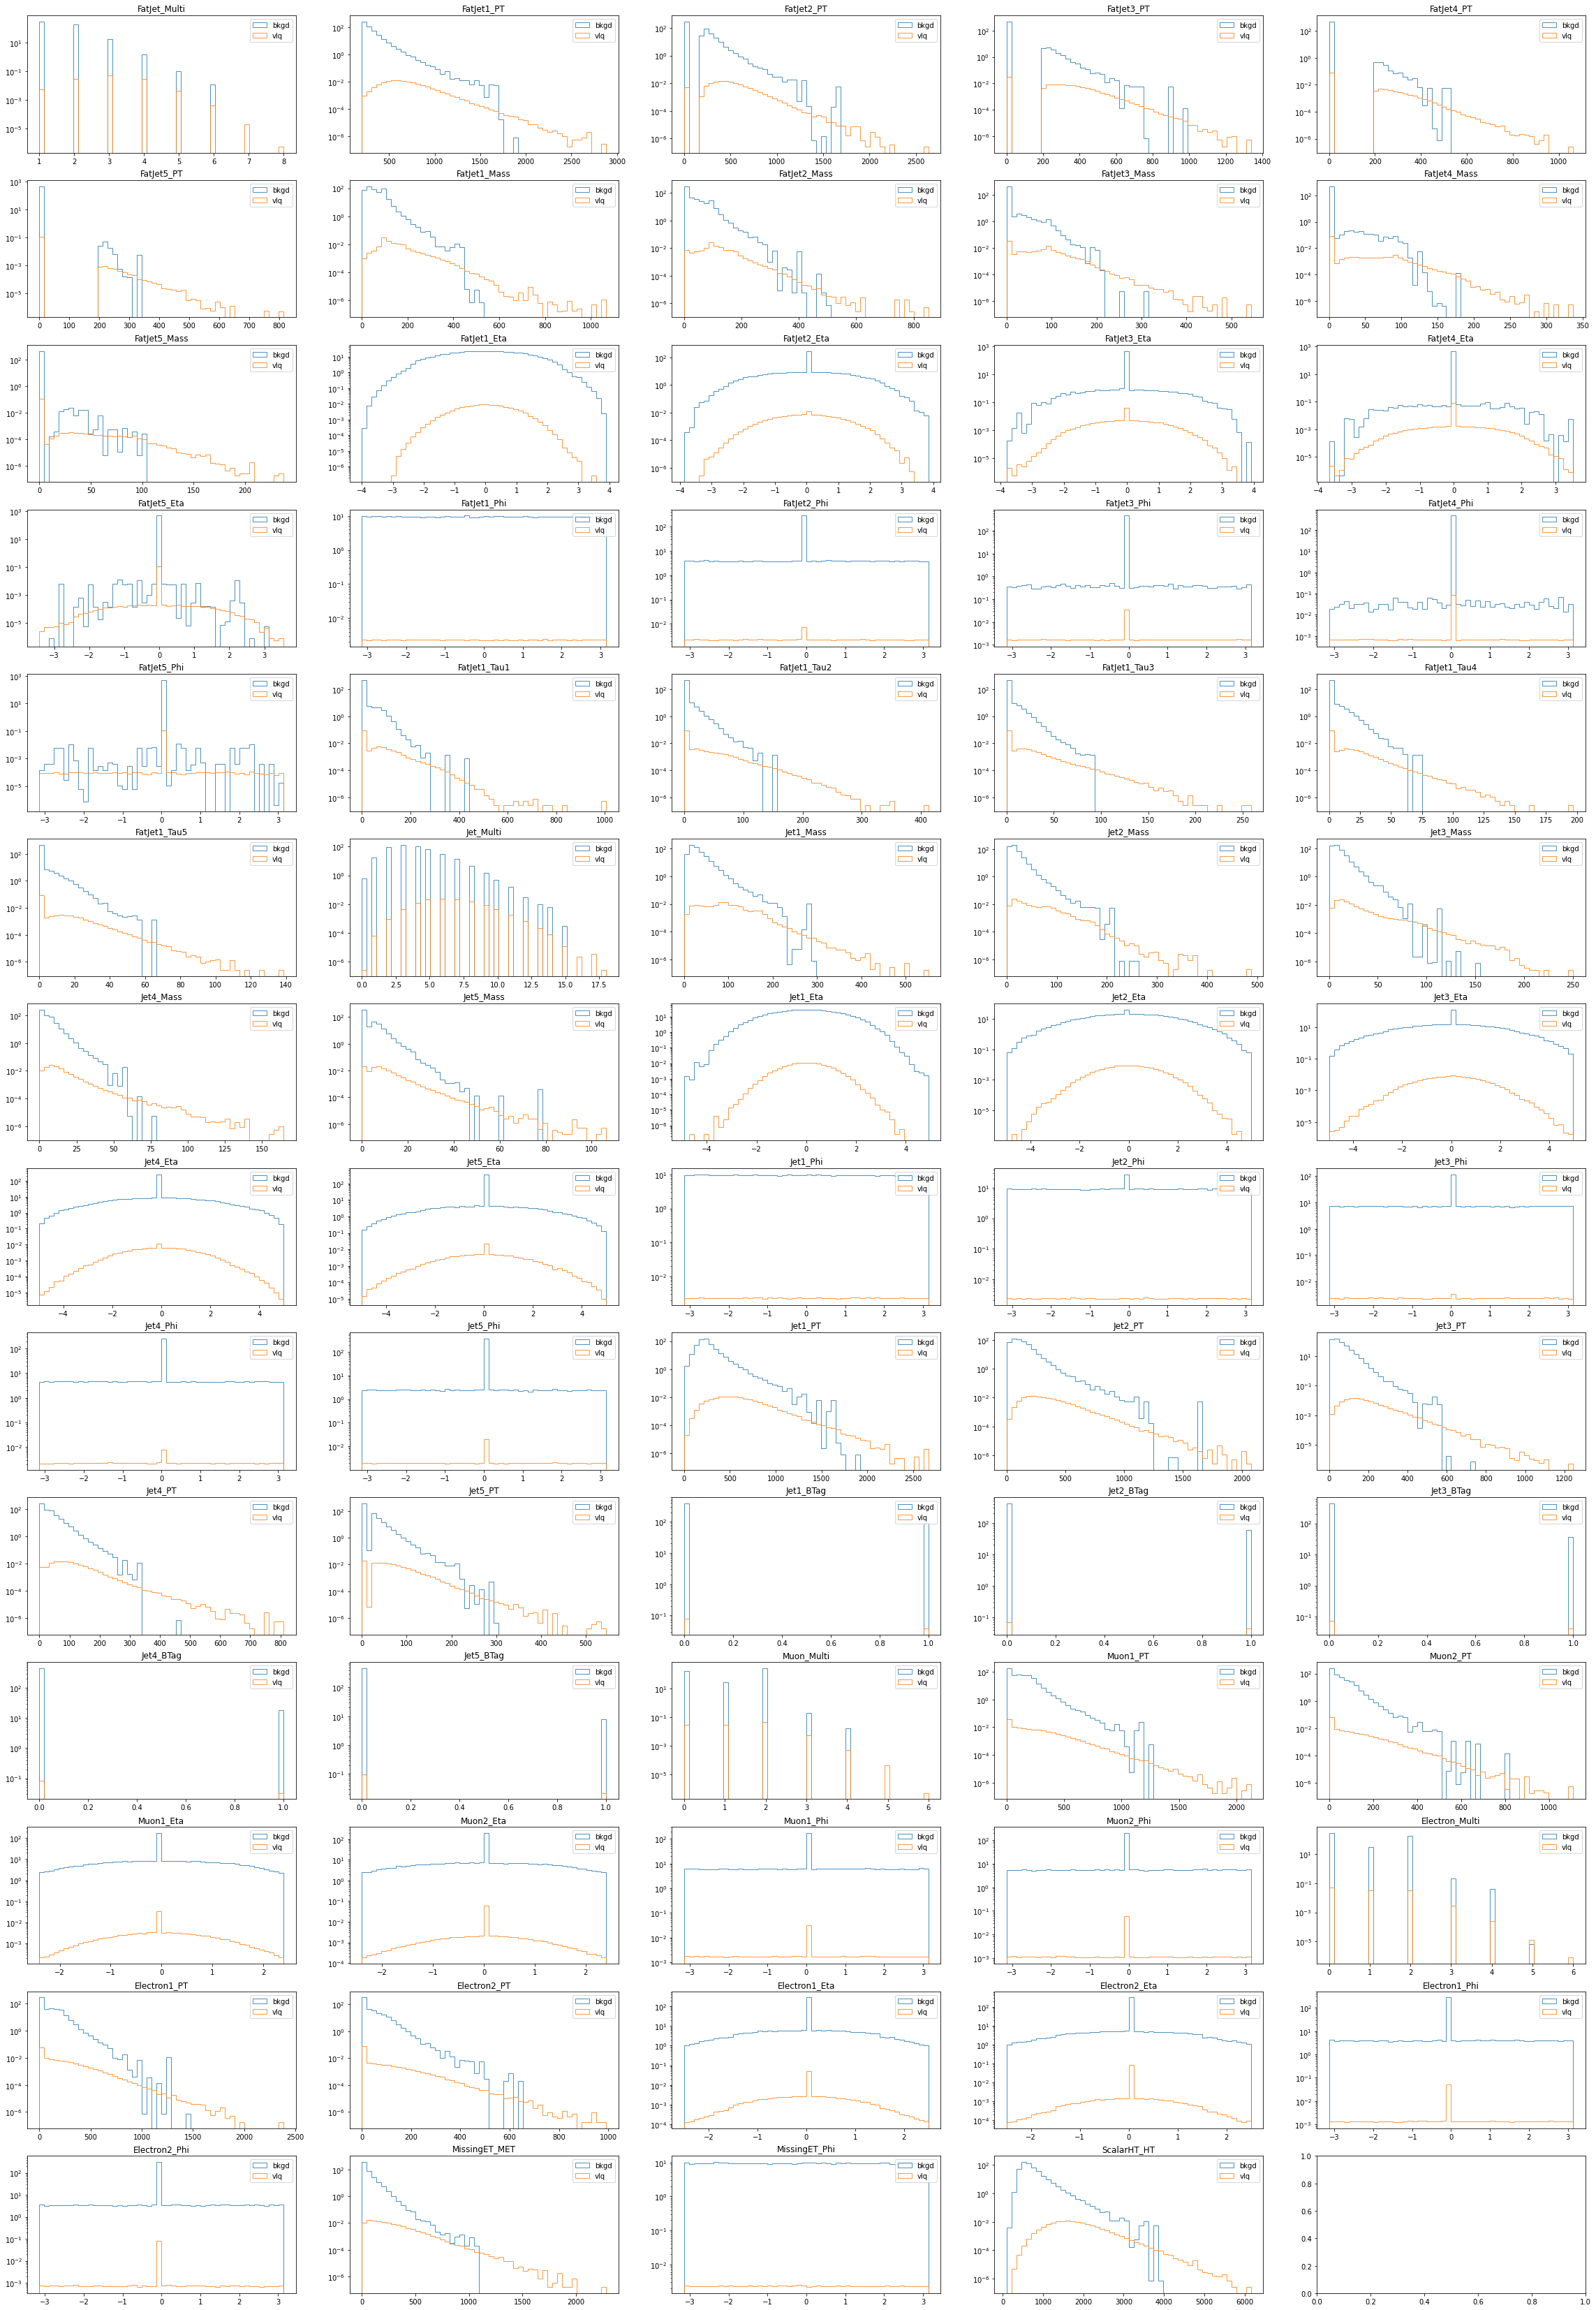

In [17]:
# Adjustment variables
num_cols, bins = 5, 50

# Create plots
num_rows = int(np.ceil((len(list(bkgd.columns)) - 2) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 60))

# Iterate and plot the data
ignore_cols = ["gen_weights", "Label", "Sample"]
for i, column in tqdm(enumerate(bkgd.columns), total=len(list(bkgd.columns)), desc="Plotting"):
    if vlq.columns[i] not in ignore_cols:
        # Define histogram range
        hist_min = min(vlq[column].min(), bkgd[column].min())
        hist_max = max(vlq[column].max(), bkgd[column].max())
        hist_range = (hist_min, hist_max)

        # Plot data
        row, col = int(i/num_cols), i%num_cols
        axs[row, col].set_title(vlq.columns[i])
        axs[row, col].hist(bkgd[column], bins=50, label="bkgd", alpha=0.8, range=hist_range,
                           weights=bkgd["gen_weights"], histtype='step')
        axs[row, col].hist(vlq[column], bins=50, label="vlq", alpha=0.8, range=hist_range,
                           weights=vlq["gen_weights"], histtype='step')
        axs[row, col].set_yscale("log")
        axs[row, col].legend()

plt.show()

## Plotting VLQ before and after cuts

In [ ]:
data_path = "data/sm_gluon_vlq"
uncut_vlq = process_data(data_path, del_cols, btag_cols, lepton_cols, False)
# vlq = process_data(data_path, del_cols, btag_cols, lepton_cols)

In [ ]:
# Adjustment variables
num_cols, bins = 5, 50

# Create plots
num_rows = int(np.ceil((len(list(vlq.columns)) - 2) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 60))

# Iterate and plot the data
ignore_cols = ["gen_weights", "Label", "Sample"]
for i, column in tqdm(enumerate(vlq.columns), total=len(list(vlq.columns)), desc="Plotting"):
    if vlq.columns[i] not in ignore_cols:
        # Define histogram range
        hist_min = min(vlq[column].min(), uncut_vlq[column].min())
        hist_max = max(vlq[column].max(), uncut_vlq[column].max())
        hist_range = (hist_min, hist_max)

        # Plot data
        row, col = int(i/num_cols), i%num_cols
        axs[row, col].set_title(vlq.columns[i])
        axs[row, col].hist(uncut_vlq[column], bins=50, label="uncut_vlq", alpha=0.8, range=hist_range,
                           weights=uncut_vlq["gen_weights"], histtype='step')
        axs[row, col].hist(vlq[column], bins=50, label="vlq", alpha=0.8, range=hist_range,
                           weights=vlq["gen_weights"], histtype='step')
        axs[row, col].set_yscale("log")
        axs[row, col].legend()

plt.show()